In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
HS1819 = pd.read_csv('School Performance/School Progress Reports/SPR_SY1819/SPR_SY1819_High_Schools.csv')
HS1718 = pd.read_csv('School Performance/School Progress Reports/SPR_SY1718/SPR_SY1718_High_Schools.csv')

In [2]:
HS1819c = HS1819[['School','Admissions Type','Report','Enrollment','Peer Group','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI/Dual Score','AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI/Dual (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect MMS Dist Score','Teach Effect MMS Prof Score','Teacher Attendance Score','Student Survey Teaching Score']]
HS1718c = HS1718[['School','Report','Enrollment','Peer Group','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI Score','AP/IB/NOCTI (Participants) Score','AP/IB/NOCTI (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect Distinguished Score','Teacher Attendance Score','Student Survey Teaching Score']]
HS1718c.rename(columns={'AP/IB/NOCTI Score':'AP/IB/NOCTI/Dual Score','AP/IB/NOCTI (Participants) Score':'AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI (Non-Participants) Score':'AP/IB/NOCTI/Dual (Non-Participants) Score','Teach Effect Distinguished Score':'Teach Effect MMS Dist Score','Teach Effect Instruction Score':'Teach Effect MMS Prof Score'},inplace=True)

C:\Users\nissy\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [3]:
HS1819c = HS1819c.drop([29,73])
HS1819c[['Enrollment','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI/Dual Score','AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI/Dual (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect MMS Dist Score','Teach Effect MMS Prof Score','Teacher Attendance Score','Student Survey Teaching Score']] = HS1819[['Enrollment','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI/Dual Score','AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI/Dual (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect MMS Dist Score','Teach Effect MMS Prof Score','Teacher Attendance Score','Student Survey Teaching Score']].apply(pd.to_numeric,errors='coerce')
HS1718c[['Enrollment','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI/Dual Score','AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI/Dual (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect MMS Dist Score','Teach Effect MMS Prof Score','Teacher Attendance Score','Student Survey Teaching Score']] = HS1819[['Enrollment','Overall Score','Ach Score','Prog Score','Clim Score','CC Score','Keystone Alg1 Prof/Adv Score','Keystone GR9 Alg1 Prof/Adv Score','Keystone Alg1 Adv Score','Keystone Bio Prof/Adv Score','Keystone Bio Adv Score','Keystone Lit Prof/Adv Score','Keystone Lit Adv Score','Keystone Alg1 AGI Score','Keystone Bio AGI Score','Keystone Lit AGI Score','Stay On Track Score','Back On Track Score','Keystone Alg1 AGI (L33P) Score','Keystone Bio AGI (L33P) Score','Keystone Lit AGI (L33P) Score','Attendance (95%+) Score','Attendance (90%-95%) Score','Attendance (85%-90%) Score','Attendance (80%-85%) Score','Attendance (<80%) Score','Retention Score','ISS Score','OSS Score','Student Survey Climate Score','Parent Survey Climate Score','Parent Survey Participation Score','Grad Score','FF Matric Score','AP/IB/NOCTI/Dual Score','AP/IB/NOCTI/Dual (Participants) Score','AP/IB/NOCTI/Dual (Non-Participants) Score','ACT/SAT Score','ACT/SAT (Participants) Score','ACT/SAT (Non-Participants) Score','FAFSA Score','Student Survey College & Career Score','Teach Effect MMS Dist Score','Teach Effect MMS Prof Score','Teacher Attendance Score','Student Survey Teaching Score']].apply(pd.to_numeric,errors='coerce')
HS1718c.to_csv(path_or_buf='HS1718 Edit')
HS1819c.to_csv(path_or_buf='HS1819 Edit')

edit1819 = pd.read_csv('HS1819 Edit')
edit1718 = pd.read_csv('HS1718 Edit')

edit1819.drop('Unnamed: 0',axis = 'columns',inplace = True)
edit1718.drop('Unnamed: 0',axis = 'columns',inplace = True)

concat1719 = pd.concat([edit1819,edit1718])
mean1719 = concat1719.groupby(['School','Admissions Type']).mean()
mean1719.reset_index(inplace=True)
mean1719

C:\Users\nissy\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\nissy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


,School,Admissions Type,ACT/SAT (Non-Participants) Score,ACT/SAT (Participants) Score,ACT/SAT Score,AP/IB/NOCTI/Dual (Non-Participants) Score,AP/IB/NOCTI/Dual (Participants) Score,AP/IB/NOCTI/Dual Score,Ach Score,Attendance (80%-85%) Score,...,Parent Survey Participation Score,Prog Score,Retention Score,Stay On Track Score,Student Survey Climate Score,Student Survey College & Career Score,Student Survey Teaching Score,Teach Effect MMS Dist Score,Teach Effect MMS Prof Score,Teacher Attendance Score
0,A. Philip Randolph Career and Technical High S...,Citywide,20.0,80.0,0.0,18.0,33.0,49.0,0,10,...,2,32,83,88.0,43,29,35,0.0,100.0,60.0
1,Abraham Lincoln High School,Neighborhood,28.0,67.0,5.0,60.0,27.0,13.0,3,7,...,13,31,84,82.0,40,24,39,2.0,93.0,61.0
2,Academy at Palumbo,Special Admit,1.0,54.0,45.0,30.0,31.0,39.0,51,2,...,35,68,97,97.0,51,27,51,43.0,57.0,90.0
3,Architecture and Design Charter School,Citywide,28.0,70.0,2.0,99.0,1.0,0.0,0,12,...,0,26,92,88.0,0,0,0,NaN,NaN,NaN
4,Arts Academy at Benjamin Rush,Special Admit,3.0,57.0,40.0,50.0,34.0,16.0,49,1,...,28,32,99,100.0,56,26,51,20.0,80.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Universal Charter School at Audenried,Neighborhood,52.0,45.0,2.0,20.0,39.0,41.0,2,11,...,18,72,86,88.0,45,32,37,NaN,NaN,NaN
79,Walter B. Saul High School,Special Admit,9.0,84.0,7.0,4.0,48.0,48.0,7,7,...,11,24,96,97.0,43,24,34,0.0,100.0,73.0
80,West Philadelphia High School,Neighborhood,32.0,67.0,1.0,70.0,22.0,9.0,0,11,...,9,41,79,82.0,43,27,42,0.0,96.0,58.0
81,William L. Sayre High School,Neighborhood,55.0,45.0,0.0,85.0,15.0,0.0,0,13,...,14,18,78,80.0,45,27,49,0.0,97.0,70.0


In [18]:
mean1719.dropna(subset=['Grad Score'],inplace=True)
mean1719

,School,Admissions Type,ACT/SAT (Non-Participants) Score,ACT/SAT (Participants) Score,ACT/SAT Score,AP/IB/NOCTI/Dual (Non-Participants) Score,AP/IB/NOCTI/Dual (Participants) Score,AP/IB/NOCTI/Dual Score,Ach Score,Attendance (80%-85%) Score,...,Parent Survey Participation Score,Prog Score,Retention Score,Stay On Track Score,Student Survey Climate Score,Student Survey College & Career Score,Student Survey Teaching Score,Teach Effect MMS Dist Score,Teach Effect MMS Prof Score,Teacher Attendance Score
0,A. Philip Randolph Career and Technical High S...,Citywide,20.0,80.0,0.0,18.0,33.0,49.0,0,10,...,2,32,83,88.0,43,29,35,0.0,100.0,60.0
1,Abraham Lincoln High School,Neighborhood,28.0,67.0,5.0,60.0,27.0,13.0,3,7,...,13,31,84,82.0,40,24,39,2.0,93.0,61.0
2,Academy at Palumbo,Special Admit,1.0,54.0,45.0,30.0,31.0,39.0,51,2,...,35,68,97,97.0,51,27,51,43.0,57.0,90.0
3,Architecture and Design Charter School,Citywide,28.0,70.0,2.0,99.0,1.0,0.0,0,12,...,0,26,92,88.0,0,0,0,NaN,NaN,NaN
4,Arts Academy at Benjamin Rush,Special Admit,3.0,57.0,40.0,50.0,34.0,16.0,49,1,...,28,32,99,100.0,56,26,51,20.0,80.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Universal Charter School at Audenried,Neighborhood,52.0,45.0,2.0,20.0,39.0,41.0,2,11,...,18,72,86,88.0,45,32,37,NaN,NaN,NaN
79,Walter B. Saul High School,Special Admit,9.0,84.0,7.0,4.0,48.0,48.0,7,7,...,11,24,96,97.0,43,24,34,0.0,100.0,73.0
80,West Philadelphia High School,Neighborhood,32.0,67.0,1.0,70.0,22.0,9.0,0,11,...,9,41,79,82.0,43,27,42,0.0,96.0,58.0
81,William L. Sayre High School,Neighborhood,55.0,45.0,0.0,85.0,15.0,0.0,0,13,...,14,18,78,80.0,45,27,49,0.0,97.0,70.0


In [5]:
#HS1819c.to_csv('HS EDIT')
npa = HS1819c['Admissions Type'].to_numpy
npa

<bound method IndexOpsMixin.to_numpy of 0               Neighborhood
1               Neighborhood
2                   Citywide
3                   Citywide
4               Neighborhood
               ...          
80    Citywide With Criteria
81              Neighborhood
82              Neighborhood
83              Neighborhood
84    Citywide With Criteria
Name: Admissions Type, Length: 82, dtype: object>

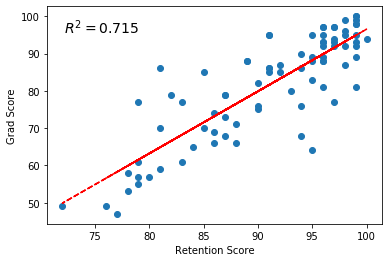

In [6]:
from sklearn.metrics import r2_score

def plot_corr(df,x_axis,y_axis):
    x = df[x_axis]
    y = df[y_axis]
    
    plt.scatter(x,y)
    z = np.polyfit(x,y,1)
    y_hat = np.poly1d(z)(x)
    
    plt.plot(x,y_hat,'r--')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    text = f"$R^2 = {r2_score(y,y_hat):0.3f}$"
    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,fontsize=14, verticalalignment='top')

def plot_scatter(df,x_axis,y_axis):
    fig, ax = plt.subplots()
    x = df[x_axis]
    y = df[y_axis]
    colors = {'Neighborhood':'red','Citywide':'blue','Special Admit':'green','Citywide With Criteria':'yellow'}
    scatter = plt.scatter(x,y,c=mean1719['Admissions Type'].map(colors))
    ax.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
plot_corr(HS1819c,'Retention Score','Grad Score')

Power_divergenceResult(statistic=107.4946694851506, pvalue=0.026119033813163064)
[[ 67.69289763 -18.37212334]
 [-18.37212334   5.07977297]]


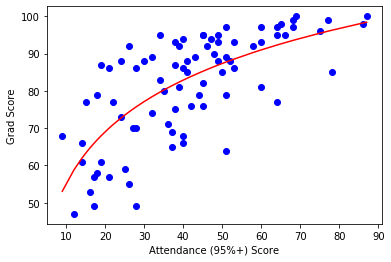

In [7]:
def plot_log(df,x_axis,y_axis):
    def func(x,a,b):
        return a+b*np.log(x)
    x = df[x_axis]
    y = df[y_axis]

    x = np.array(x,dtype=float)
    y = np.array(y,dtype=float)

    popt,pcov = curve_fit(func,x,y)

    pairs = []
    for i, j in zip(x, y):
        pairs.append([i,j])

    sortedList = sorted(pairs, key = lambda x:x[0])
    sorted_x = np.array(sortedList)[:,0]
    sorted_y = np.array(sortedList)[:,1]

    plt.plot(sorted_x,sorted_y,'bo')
    plt.plot(sorted_x,func(sorted_x,*popt),'r-')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    
    a,b = popt
    f_expected = []
    for x_examp in sorted_x:
        f_expected.append(a+b*np.log(x_examp))
    print(chisquare(sorted_y,f_expected))
    print(pcov)
    

plot_log(HS1819c,'Attendance (95%+) Score','Grad Score')

Power_divergenceResult(statistic=24.22935351931729, pvalue=0.9999999998892518)
[[ 3.89609407 -1.08663267]
 [-1.08663267  0.32378354]]


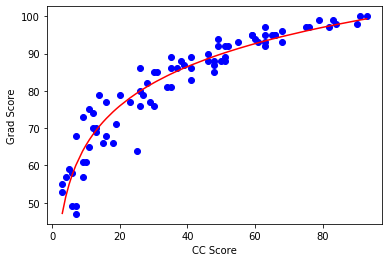

In [8]:
plot_log(HS1819c,'CC Score','Grad Score')

No handles with labels found to put in legend.


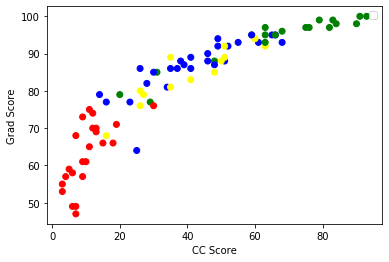

In [9]:
plot_scatter(mean1719,'CC Score','Grad Score')

No handles with labels found to put in legend.


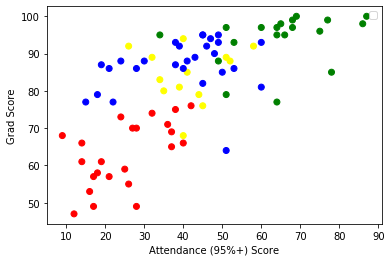

In [22]:
plot_scatter(mean1719,'Attendance (95%+) Score','Grad Score')

No handles with labels found to put in legend.


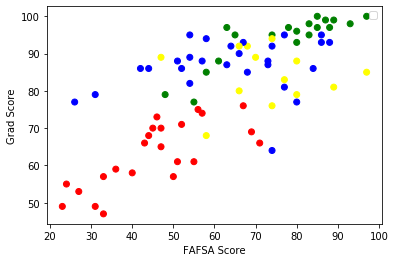

In [12]:
plot_scatter(mean1719,'FAFSA Score','Grad Score')

In [13]:
plot_log(HS1819c,'Keystone Lit Prof/Adv Score','Grad Score')

ValueError: array must not contain infs or NaNs

No handles with labels found to put in legend.


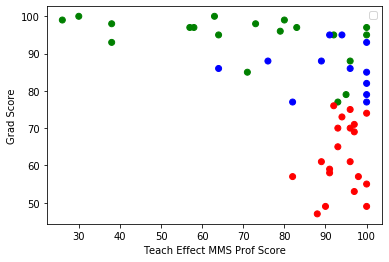

In [14]:
plot_scatter(mean1719,"Teach Effect MMS Prof Score","Grad Score")

No handles with labels found to put in legend.


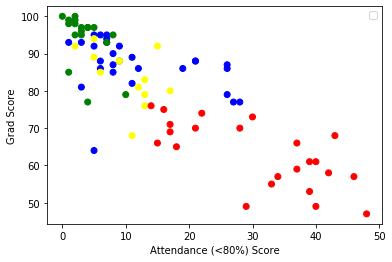

In [15]:
plot_scatter(mean1719,"Attendance (<80%) Score","Grad Score")

No handles with labels found to put in legend.


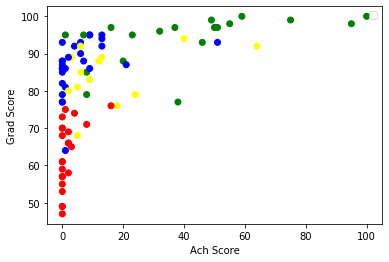

In [16]:
plot_scatter(mean1719,"Ach Score","Grad Score")

No handles with labels found to put in legend.


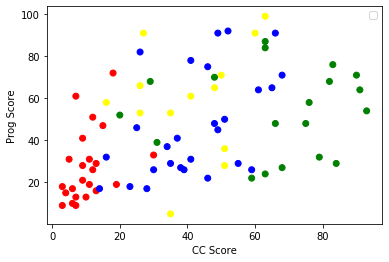

In [20]:
plot_scatter(mean1719,"CC Score","Prog Score")

No handles with labels found to put in legend.


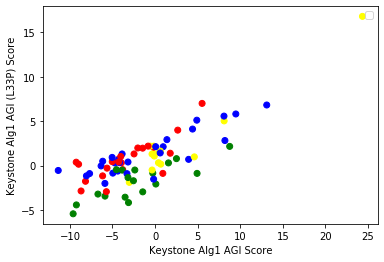

In [24]:
plot_scatter(mean1719,"Keystone Alg1 AGI Score","Keystone Alg1 AGI (L33P) Score")

In [29]:
def plot_1d(df, x_axis):
    fig, ax = plt.subplots()
    x = df[x_axis]
    y = np.zeros_like(x)
    colors = {'Neighborhood':'red','Citywide':'blue','Special Admit':'green','Citywide With Criteria':'yellow'}
    scatter = plt.scatter(x,y,c=mean1719['Admissions Type'].map(colors))
    ax.legend()
    plt.xlabel(x_axis)

No handles with labels found to put in legend.


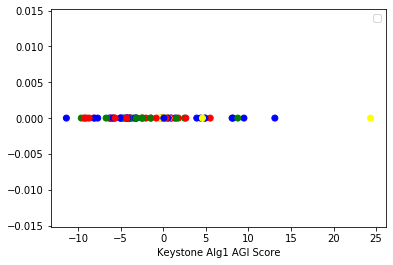

In [30]:
plot_1d(mean1719, 'Keystone Alg1 AGI Score')

In [37]:
def plot_scatter_1819(df,x_axis,y_axis):
    fig, ax = plt.subplots()
    x = df[x_axis]
    y = df[y_axis]
    colors = {'Neighborhood':'red','Citywide':'blue','Special Admit':'green','Citywide With Criteria':'yellow'}
    scatter = plt.scatter(x,y,c=HS1819c['Admissions Type'].map(colors))
    ax.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

No handles with labels found to put in legend.


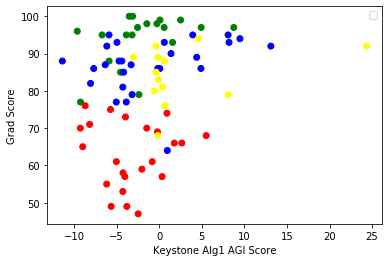

In [38]:
plot_scatter_1819(HS1819c, 'Keystone Alg1 AGI Score','Grad Score')

No handles with labels found to put in legend.


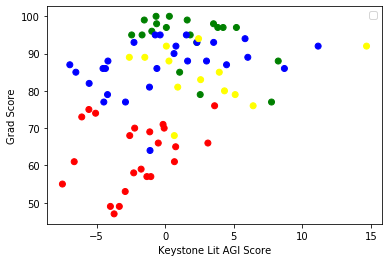

In [39]:
plot_scatter_1819(HS1819c, 'Keystone Lit AGI Score','Grad Score')

No handles with labels found to put in legend.


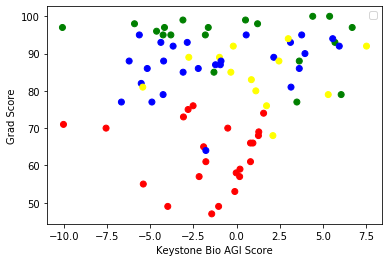

In [40]:
plot_scatter_1819(HS1819c, 'Keystone Bio AGI Score','Grad Score')

No handles with labels found to put in legend.


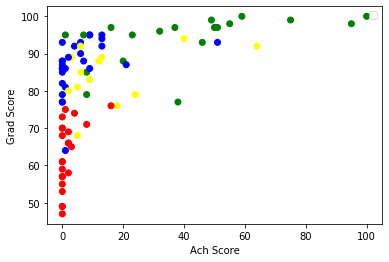

In [41]:
plot_scatter(mean1719,'Ach Score','Grad Score')

No handles with labels found to put in legend.


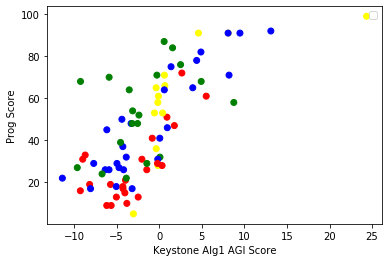

In [47]:
plot_scatter(mean1719,'Keystone Alg1 AGI Score','Prog Score')

No handles with labels found to put in legend.


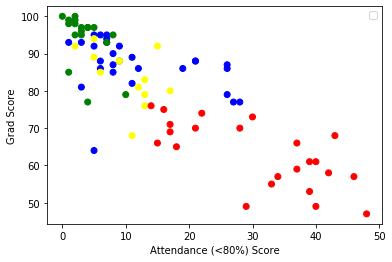

In [44]:
plot_scatter(mean1719,'Attendance (<80%) Score','Grad Score')

No handles with labels found to put in legend.


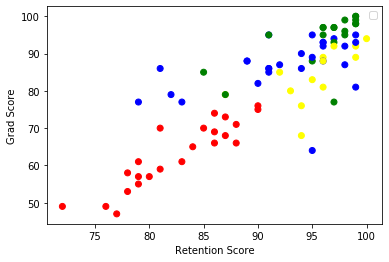

In [49]:
plot_scatter(mean1719,'Retention Score','Grad Score')